In [1]:
import pandas as pd

data = pd.read_csv("one_hot_encoded_data.csv", index_col=[0])

In [2]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,debt_settlement_flag_N,debt_settlement_flag_Y,settlement_status_ACTIVE,settlement_status_BROKEN,settlement_status_COMPLETE,settlement_status_No,next_pymnt_d_Apr-2019,next_pymnt_d_Feb-2019,next_pymnt_d_Mar-2019,next_pymnt_d_Unkown
0,10000.0,10000.0,10000.0,4.0,307.27,10.0,55000.0,Current,19.22,0.0,...,1,0,0,0,0,1,0,0,1,0
1,35000.0,35000.0,35000.0,18.0,770.63,10.0,200000.0,Current,17.80,1.0,...,1,0,0,0,0,1,0,0,1,0
2,9600.0,9600.0,9600.0,8.0,300.13,3.0,90000.0,Current,25.59,1.0,...,1,0,0,0,0,1,0,0,1,0
3,18000.0,18000.0,18000.0,6.0,557.52,10.0,70000.0,Current,5.55,0.0,...,1,0,0,0,0,1,0,0,1,0
4,12000.0,12000.0,12000.0,10.0,378.59,3.0,36500.0,Current,33.61,0.0,...,1,0,0,0,0,1,0,0,1,0


In [3]:
X = data.drop(columns=["loan_status"])
y = data["loan_status"]


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


c:\program files\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
print("y.unique() is ", y.unique())
# category
# category[y]

y.unique() is  ['Current' 'Fully Paid' 'Late (31-120 days)' 'Late (16-30 days)'
 'In Grace Period' 'Charged Off' 'Default']


# ROC Curves

In [10]:
from sklearn.preprocessing import label_binarize
y_test = label_binarize(y_test, classes=['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)'])

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
clf = OneVsRestClassifier(GradientBoostingClassifier())
y_score = clf.fit(X_train, y_train).decision_function(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


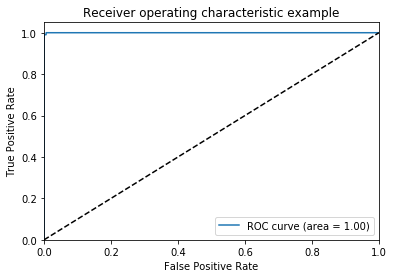

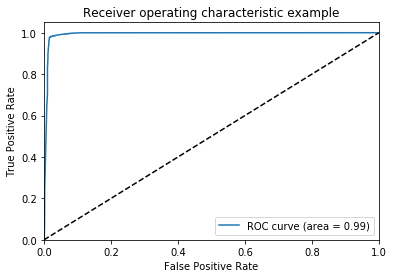

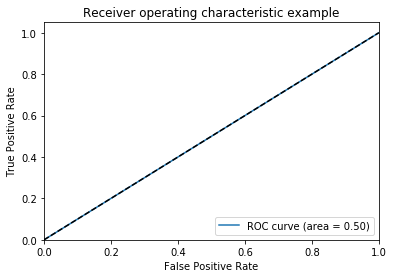

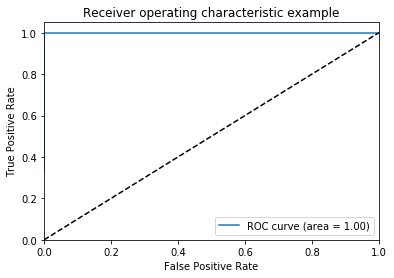

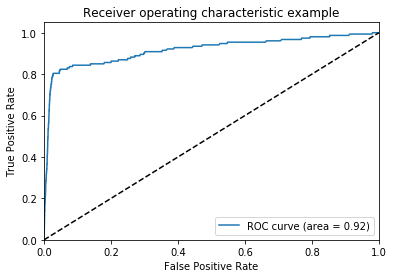

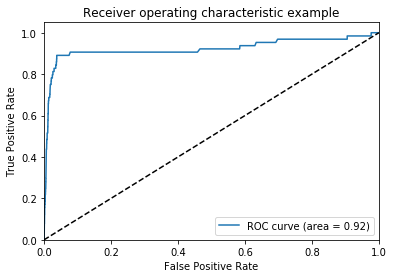

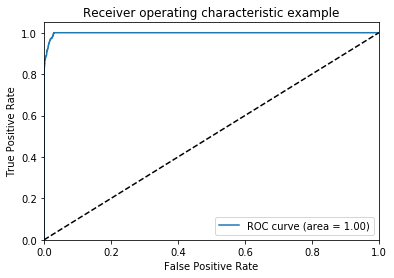

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(7):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<Figure size 432x288 with 0 Axes>

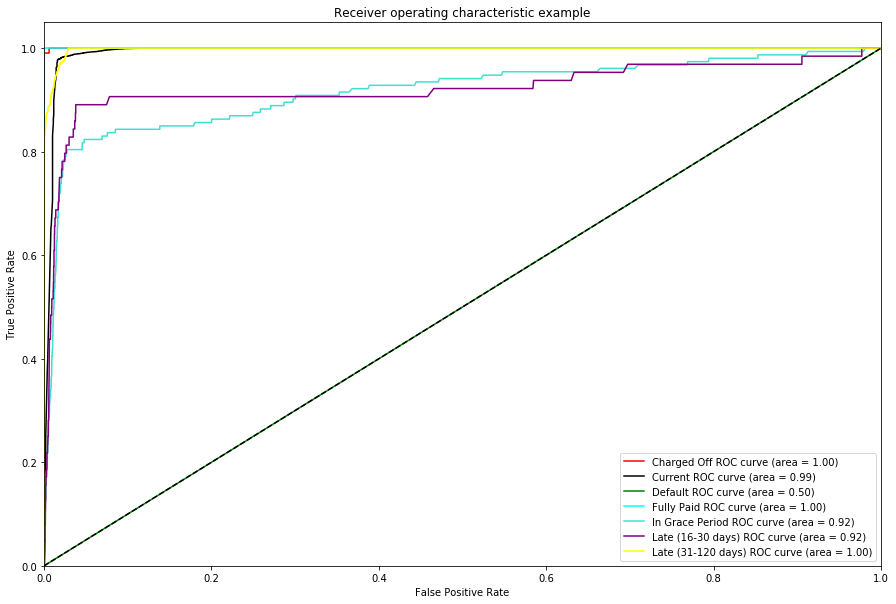

In [13]:
labels = ['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)']
plt.figure()
color=['red','black','green','cyan','turquoise','purple','yellow']
fig, ax=plt.subplots(figsize = (15,10))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label= '{} ROC curve (area = %0.2f)'.format(labels[i]) % roc_auc[i],color=color[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()
fig.savefig('XGBoost ROC.png')